In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
avito = pd.read_csv('avito.csv')

print(avito.info())
print(avito.describe())
print(avito.head())
print(avito.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39958 entries, 0 to 39957
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   itemid       39958 non-null  int64  
 1   category     39958 non-null  object 
 2   subcategory  39958 non-null  object 
 3   title        39958 non-null  object 
 4   description  39344 non-null  object 
 5   attrs        38822 non-null  object 
 6   price        39958 non-null  int64  
 7   is_proved    2773 non-null   float64
 8   is_blocked   39958 non-null  int64  
 9   phones_cnt   39958 non-null  int64  
 10  emails_cnt   39958 non-null  int64  
 11  urls_cnt     39958 non-null  int64  
 12  close_hours  39958 non-null  float64
dtypes: float64(2), int64(6), object(5)
memory usage: 4.0+ MB
None
             itemid         price    is_proved    is_blocked    phones_cnt  \
count  3.995800e+04  3.995800e+04  2773.000000  39958.000000  39958.000000   
mean   5.495010e+07  7.466702e+05     

is_proved i close_hours zajedno sa id-jem se izbacuju iz daljeg modelovanja
Ideja: koristiti prva dva navedena da se zadatak binarne klasifikacije potencijalno prebaci u regresiju.

In [3]:
print(avito.columns)

Index(['itemid', 'category', 'subcategory', 'title', 'description', 'attrs',
       'price', 'is_proved', 'is_blocked', 'phones_cnt', 'emails_cnt',
       'urls_cnt', 'close_hours'],
      dtype='object')


In [3]:
avito.head()

,itemid,category,subcategory,title,description,attrs,price,is_proved,is_blocked,phones_cnt,emails_cnt,urls_cnt,close_hours
0,11698253,Личные вещи,Товары для детей и игрушки,Коляска,"Теплый чехол на ножки, ремни безопасности, дож...","{""Вид товара"":""Детские коляски""}",1700,NaN,0,0,0,0,21.84
1,11798013,Бытовая электроника,Планшеты и электронные книги,"7"" Планшет Perfeo 7777HD/A 8 Гб, 3G белый","Планшет новый, комплект полный, звоните, доста...","{""Вид товара"":""Планшеты""}",3000,NaN,0,0,0,0,1.77
2,10446713,Недвижимость,Квартиры,"2-к квартира, 49 м², 4/5 эт.","2-ух комнатная квартира улучшенной планировки,...","{""Тип объявления"":""Продам"", ""Количество комнат...",1700000,NaN,0,0,0,0,0.34
3,11719780,Недвижимость,Квартиры,"1-к квартира, 20 м², 4/5 эт.","В ХОРОШЕМ СОСТОЯНИЕ,БАЛКОН,ПЛАСТИКОВЫЕ ТРУБЫ!","{""Тип объявления"":""Продам"", ""Количество комнат...",1200000,NaN,0,0,0,0,0.01
4,12089873,Личные вещи,Товары для детей и игрушки,Шатер игрушечный складной,Шатер (палатка) для игр. Диаметр 120 см. Скла...,"{""Вид товара"":""Игрушки""}",500,NaN,0,0,0,0,0.20


In [4]:
avito = avito.drop(columns=['itemid','is_proved','close_hours'])

pogled na izgled data frejma:

In [5]:
avito.head()

,category,subcategory,title,description,attrs,price,is_blocked,phones_cnt,emails_cnt,urls_cnt
0,Личные вещи,Товары для детей и игрушки,Коляска,"Теплый чехол на ножки, ремни безопасности, дож...","{""Вид товара"":""Детские коляски""}",1700,0,0,0,0
1,Бытовая электроника,Планшеты и электронные книги,"7"" Планшет Perfeo 7777HD/A 8 Гб, 3G белый","Планшет новый, комплект полный, звоните, доста...","{""Вид товара"":""Планшеты""}",3000,0,0,0,0
2,Недвижимость,Квартиры,"2-к квартира, 49 м², 4/5 эт.","2-ух комнатная квартира улучшенной планировки,...","{""Тип объявления"":""Продам"", ""Количество комнат...",1700000,0,0,0,0
3,Недвижимость,Квартиры,"1-к квартира, 20 м², 4/5 эт.","В ХОРОШЕМ СОСТОЯНИЕ,БАЛКОН,ПЛАСТИКОВЫЕ ТРУБЫ!","{""Тип объявления"":""Продам"", ""Количество комнат...",1200000,0,0,0,0
4,Личные вещи,Товары для детей и игрушки,Шатер игрушечный складной,Шатер (палатка) для игр. Диаметр 120 см. Скла...,"{""Вид товара"":""Игрушки""}",500,0,0,0,0


izbacivanje nedostajućih vrednosti...
Ideja: sve nan vrednosti su tekstualnog tipa (kategoričke promenljive) menjati sa modusom.

In [6]:
from sklearn.impute import SimpleImputer
def impute_values(df):
    df_cat = df.select_dtypes(include='object')
    cat_cols = df_cat.columns  
    
    imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    df_cat = imp.fit_transform(df_cat)  
    
    df_cat = pd.DataFrame(df_cat, columns=cat_cols)
    
    return df_cat, cat_cols


categories,cat_cols = impute_values(avito)
avito[cat_cols] = categories


In [7]:
print(avito.isna().sum())

category       0
subcategory    0
title          0
description    0
attrs          0
price          0
is_blocked     0
phones_cnt     0
emails_cnt     0
urls_cnt       0
dtype: int64


### Vizualizacija podataka:

In [8]:
avito['is_blocked'] = avito['is_blocked'].map({1:'True',0:'False'})

In [9]:
print(avito['category'].unique())
print('**********')
for category, group in avito.groupby('category'):
    unique_subcategories = group['subcategory'].unique()
    print(f"Category: {category}")
    print("Unique Subcategories:", unique_subcategories)
    print()

['Личные вещи' 'Бытовая электроника' 'Недвижимость' 'Хобби и отдых'
 'Транспорт' 'Услуги' 'Для дома и дачи' 'Работа' 'Для бизнеса' 'Животные']
**********
Category: Бытовая электроника
Unique Subcategories: ['Планшеты и электронные книги' 'Игры, приставки и программы' 'Телефоны'
 'Аудио и видео' 'Фототехника' 'Товары для компьютера'
 'Настольные компьютеры' 'Ноутбуки' 'Оргтехника и расходники']

Category: Для бизнеса
Unique Subcategories: ['Оборудование для бизнеса' 'Готовый бизнес' 'Продукты питания']

Category: Для дома и дачи
Unique Subcategories: ['Мебель и интерьер' 'Ремонт и строительство' 'Посуда и товары для кухни'
 'Бытовая техника' 'Растения' 'Продукты питания']

Category: Животные
Unique Subcategories: ['Другие животные' 'Кошки' 'Собаки' 'Аквариум' 'Товары для животных'
 'Птицы']

Category: Личные вещи
Unique Subcategories: ['Товары для детей и игрушки' 'Одежда, обувь, аксессуары'
 'Детская одежда и обувь' 'Красота и здоровье' 'Часы и украшения']

Category: Недвижимость
Uniqu

In [10]:
category_map = {
    'Транспорт':'Transport',
    'Услуги':'Services',
    'Личные вещи':'Personal Items',
    'Недвижимость':'Real estate',
    'Бытовая электроника':'Consumer Electronics',
    'Для дома и дачи':'For home and garden',
    'Хобби и отдых':'Hobbies and leisure',
    'Работа':'Work',
    'Для бизнеса':'For business',
    'Животные':'Animals',
    
}
subcategory_map = {
    'Автомобили с пробегом': 'Used Cars',
    'Предложения услуг': 'Service Offers',
    'Одежда, обувь, аксессуары': 'Clothing, Footwear, Accessories',
    'Запчасти и аксессуары': 'Spare Parts and Accessories',
    'Комнаты': 'Rooms',
    'Дома, дачи, коттеджи': 'Houses, Dachas, Cottages',
    'Телефоны': 'Phones',
    'Детская одежда и обувь': 'Children\'s Clothing and Footwear',
    'Квартиры': 'Apartments',
    'Мебель и интерьер': 'Furniture and Interior',
    'Товары для детей и игрушки': 'Children\'s Goods and Toys',
    'Спорт и отдых': 'Sports and Recreation',
    'Коммерческая недвижимость': 'Commercial Real Estate',
    'Запросы на услуги': 'Service Requests',
    'Грузовики и спецтехника': 'Trucks and Special Equipment',
    'Часы и украшения': 'Watches and Jewelry',
    'Вакансии': 'Job Vacancies',
    'Велосипеды': 'Bicycles',
    'Оборудование для бизнеса': 'Business Equipment',
    'Ремонт и строительство': 'Repair and Construction',
    'Мотоциклы и мототехника': 'Motorcycles and Motor Equipment',
    'Резюме': 'Resumes',
    'Билеты и путешествия': 'Tickets and Travel',
    'Коллекционирование': 'Collectibles',
    'Планшеты и электронные книги': 'Tablets and E-books',
    'Новые автомобили': 'New Cars',
    'Земельные участки': 'Land Plots',
    'Красота и здоровье': 'Beauty and Health',
    'Товары для компьютера': 'Computer Goods',
    'Аудио и видео': 'Audio and Video',
    'Гаражи и машиноместа': 'Garages and Parking Spaces',
    'Фототехника': 'Photographic Equipment',
    'Бытовая техника': 'Household Appliances',
    'Другие животные': 'Other Animals',
    'Игры, приставки и программы': 'Games, Consoles, and Software',
    'Знакомства': 'Dating',
    'Кошки': 'Cats',
    'Оргтехника и расходники': 'Office Equipment and Supplies',
    'Книги и журналы': 'Books and Magazines',
    'Собаки': 'Dogs',
    'Посуда и товары для кухни': 'Tableware and Kitchen Goods',
    'Готовый бизнес': 'Ready Business',
    'Музыкальные инструменты': 'Musical Instruments',
    'Водный транспорт': 'Water Transport',
    'Недвижимость за рубежом': 'Real Estate Abroad'
}
avito['category'] = avito['category'].map(category_map)
avito['subcategory'] = avito['subcategory'].map(subcategory_map)

In [11]:
avito_numerical = avito.select_dtypes(include=['number'])
avito_numerical.head()

,price,phones_cnt,emails_cnt,urls_cnt
0,1700,0,0,0
1,3000,0,0,0
2,1700000,0,0,0
3,1200000,0,0,0
4,500,0,0,0


In [12]:
avito['price'].describe()

count    3.995800e+04
mean     7.466702e+05
std      1.025186e+07
min      0.000000e+00
25%      7.000000e+02
50%      6.500000e+03
75%      1.300000e+05
max      1.000000e+09
Name: price, dtype: float64

In [14]:
avito['phones_cnt'].value_counts()

phones_cnt
0      36143
1       3043
2        469
3        188
4         57
5         33
6          5
8          4
7          3
13         2
9          2
19         1
25         1
33         1
116        1
12         1
100        1
20         1
18         1
17         1
Name: count, dtype: int64

In [15]:
avito['emails_cnt'].value_counts()

emails_cnt
0    39644
1      306
2        8
Name: count, dtype: int64

In [16]:
avito['urls_cnt'].value_counts()

urls_cnt
0    38889
1      990
2       64
3       13
4        1
5        1
Name: count, dtype: int64

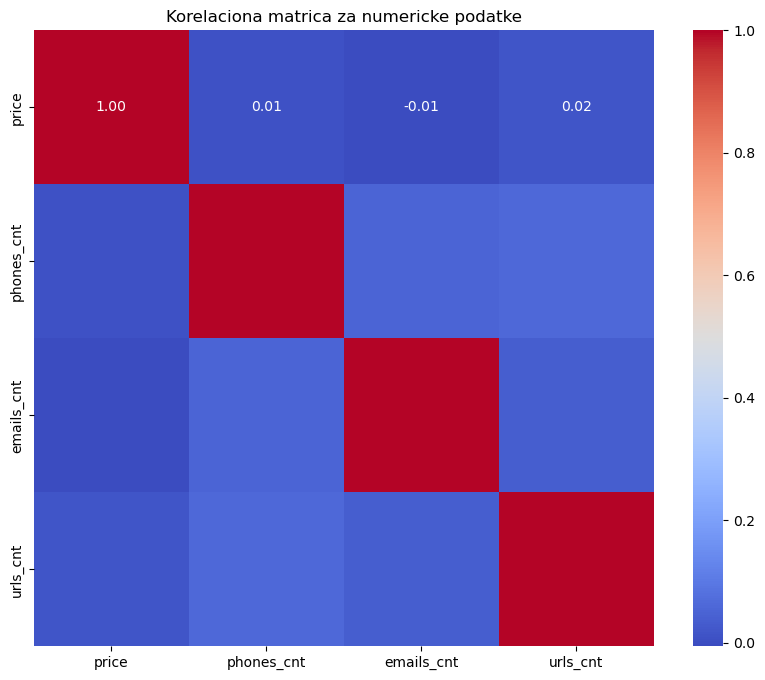

In [17]:
correlation_matrix = avito_numerical.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt='.2f')
plt.title('Korelaciona matrica za numericke podatke')
plt.show()

In [18]:
print(correlation_matrix)

               price  phones_cnt  emails_cnt  urls_cnt
price       1.000000    0.007462   -0.005514  0.015722
phones_cnt  0.007462    1.000000    0.051172  0.058271
emails_cnt -0.005514    0.051172    1.000000  0.034821
urls_cnt    0.015722    0.058271    0.034821  1.000000


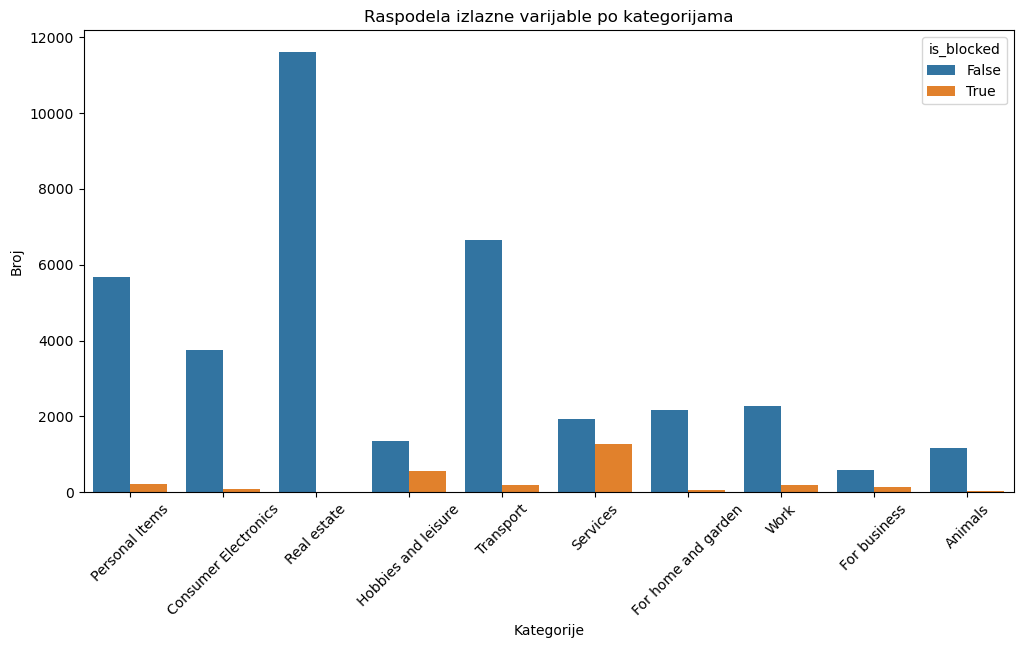

In [19]:
plt.figure(figsize=(12,6))
sns.countplot(data = avito, x = 'category', hue = 'is_blocked')
plt.title('Raspodela izlazne varijable po kategorijama')
plt.xlabel('Kategorije')
plt.ylabel('Broj')
plt.xticks(rotation = 45)
plt.show()
#sumnjiva kategorija je kategorija za nekretnine - veliki broj podataka koji nisu 'ilicit' - ukloniti?

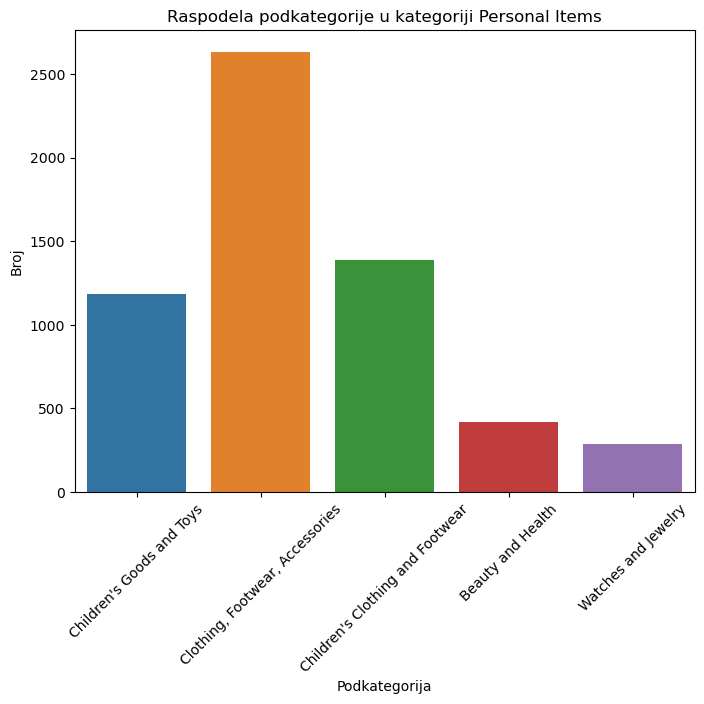

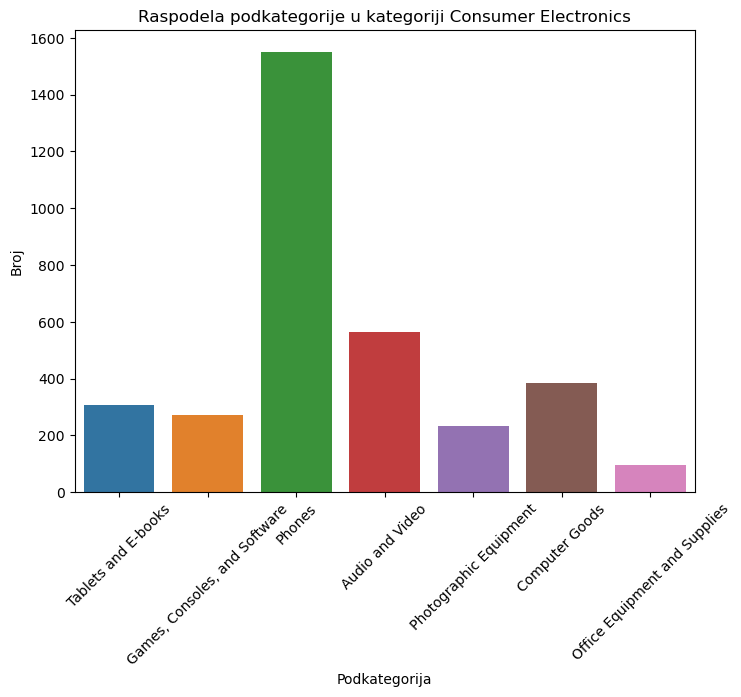

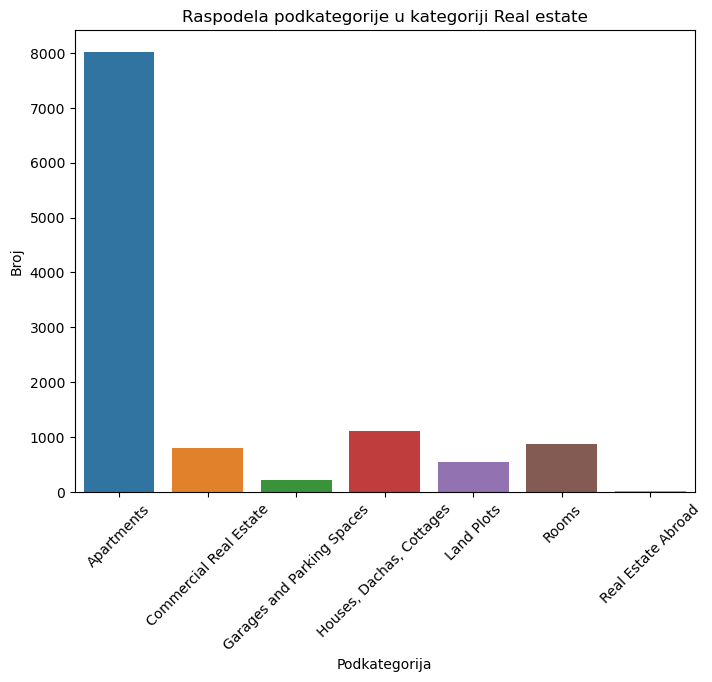

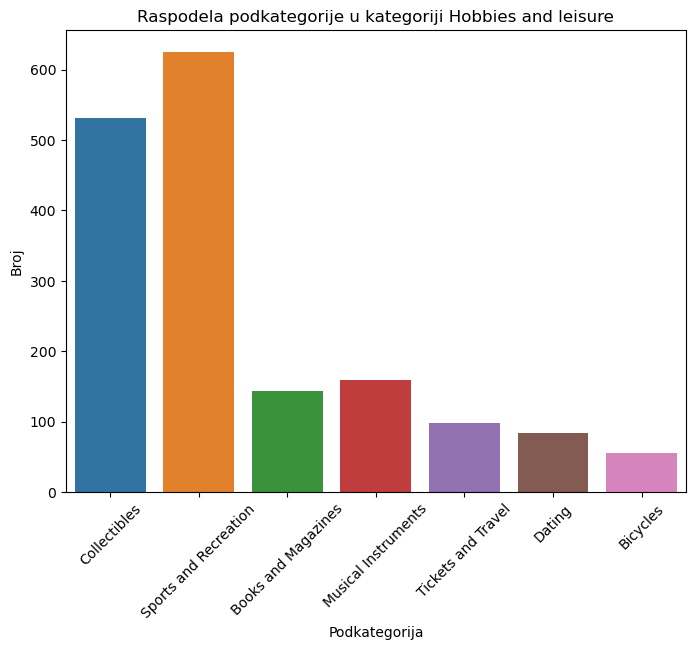

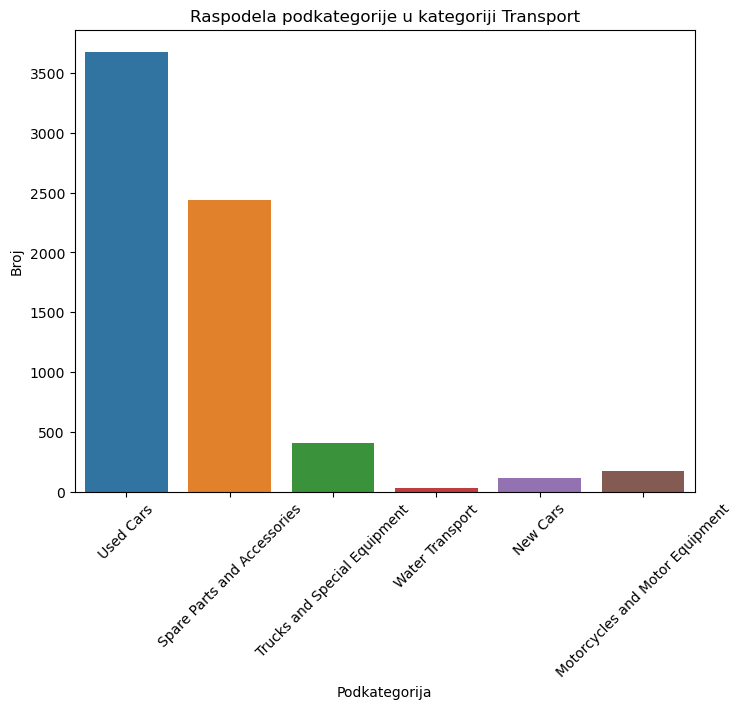

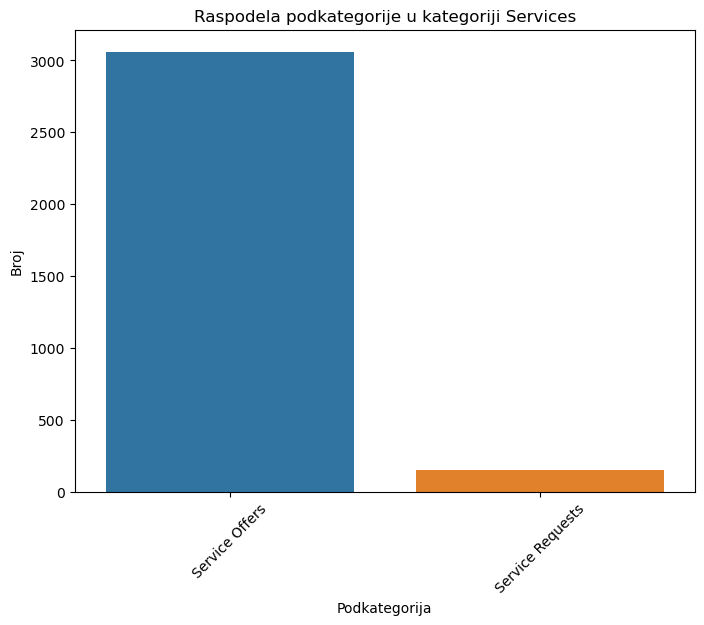

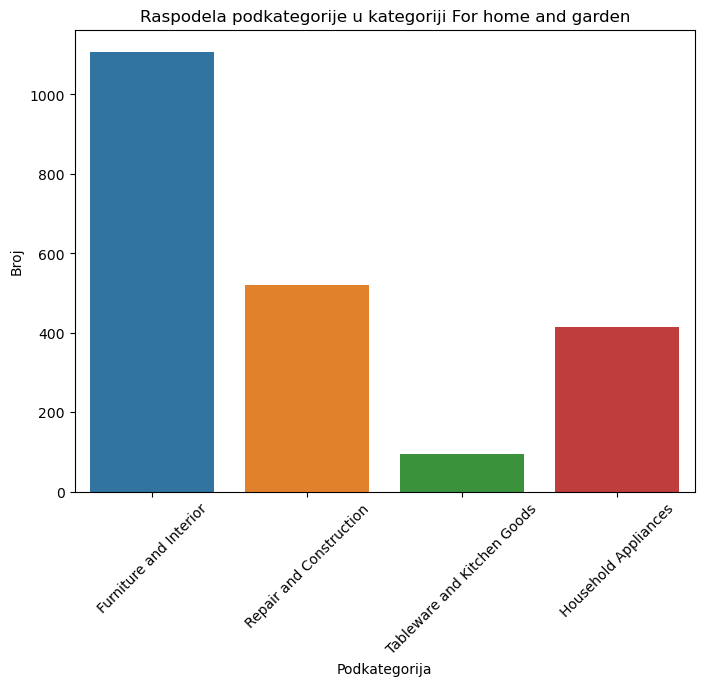

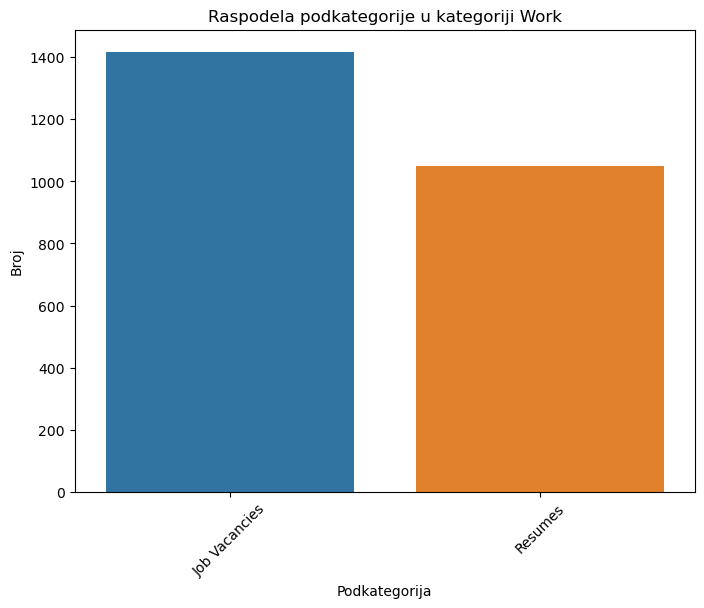

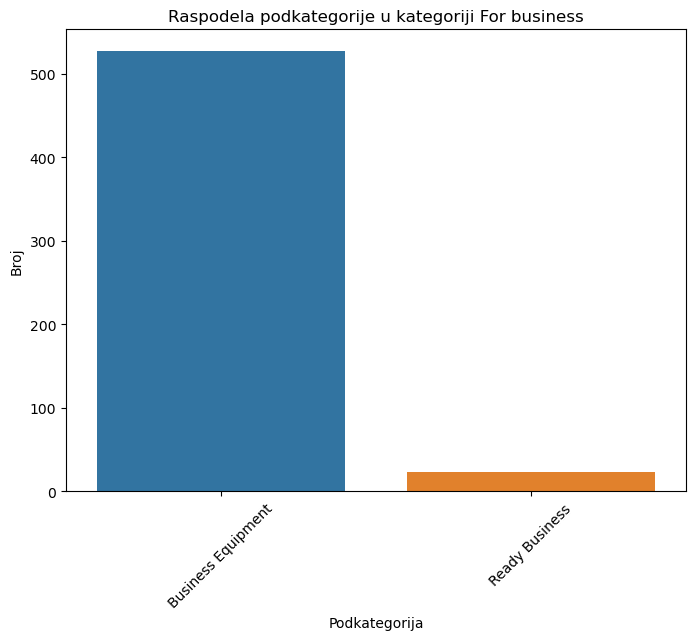

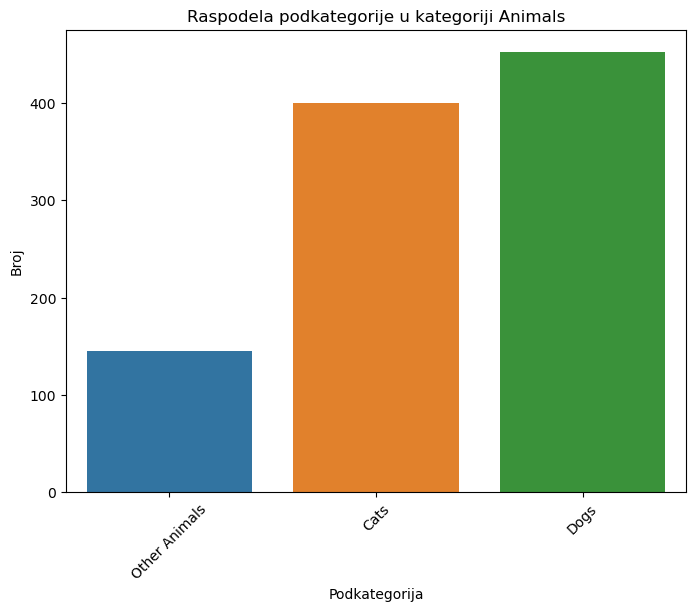

In [20]:
categories =  avito['category'].unique()
for category in categories:
    plt.figure(figsize=(8,6))
    df_category = avito[avito['category'] == category]
    sns.countplot(data = df_category, x = 'subcategory')
    plt.title(f'Raspodela podkategorije u kategoriji {category}')
    plt.xlabel('Podkategorija')
    plt.ylabel('Broj')
    plt.xticks(rotation = 45)
    plt.show()                    

<Axes: xlabel='emails_cnt', ylabel='count'>

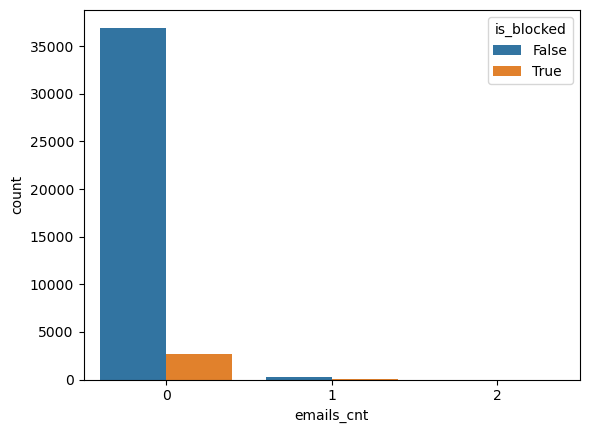

In [21]:
sns.countplot(data = avito, x = 'emails_cnt',hue = 'is_blocked')
#najveci broj reklama ima 0 mejlova navedenih - prilicno nebalansirano

<Axes: xlabel='urls_cnt', ylabel='count'>

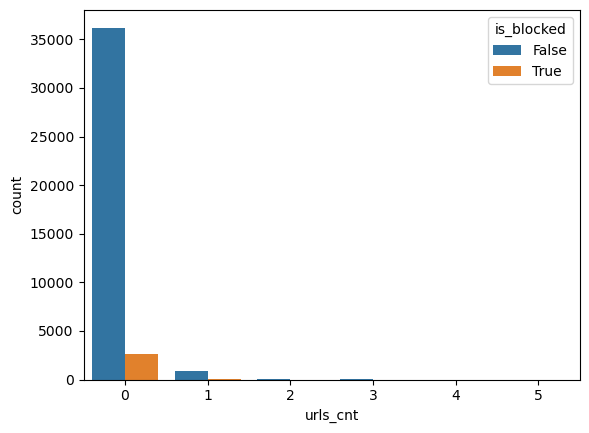

In [22]:
sns.countplot(data = avito, x = 'urls_cnt',hue = 'is_blocked')

<Axes: xlabel='phones_cnt', ylabel='count'>

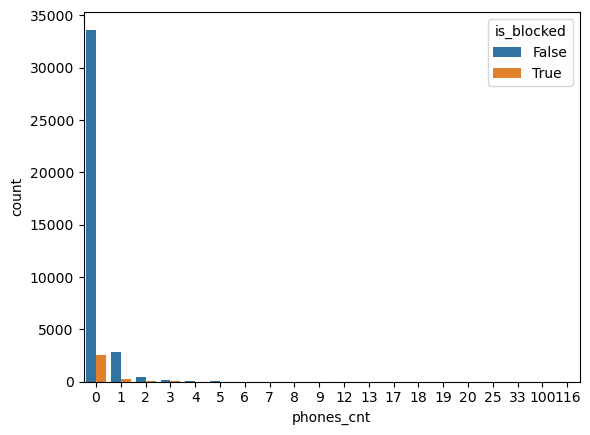

In [23]:
sns.countplot(data = avito, x = 'phones_cnt',hue = 'is_blocked')

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(avito['price'])
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(df['price'].min(), avito['price'].max())
plt.show()

In [3]:
avito = avito[avito['category'] != 'Real estate']
avito.shape

(39958, 13)

In [9]:
numerical_data = ['price','emails_cnt','urls_cnt','phones_cnt']

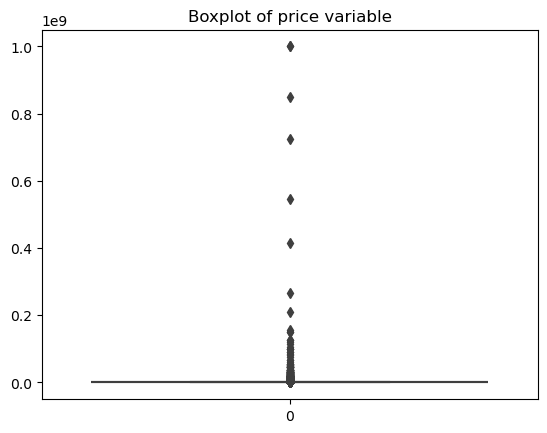

In [15]:
plt.title('Boxplot of price variable')
sns.boxplot(avito['price'])
plt.show()

In [22]:
from scipy.stats import mstats

# Winsorization
pom = mstats.winsorize(avito['price'], limits=[0,0.21])
pom1 = mstats.winsorize(pom, limits=[0.1,1])


In [24]:
avito['price'] = pom

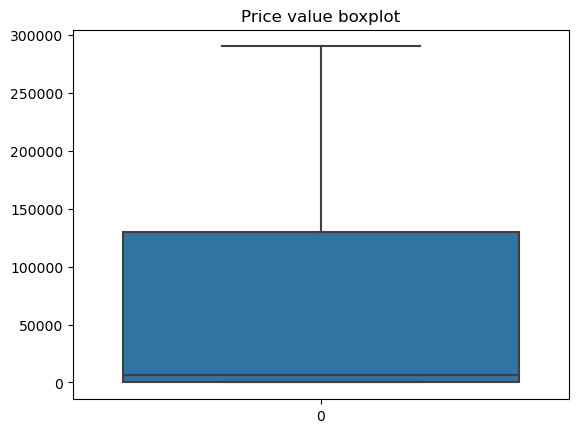

In [23]:
sns.boxplot(pom)
plt.title('Price value boxplot')
plt.show()

<Axes: >

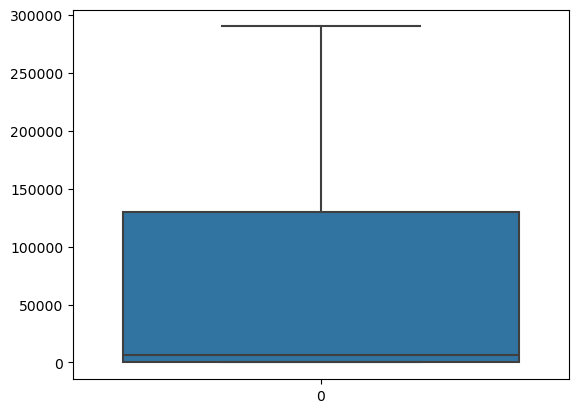

In [26]:
sns.boxplot(avito['price'])

In [27]:
from scipy.stats import shapiro
numerical_data = ['price','phones_cnt','urls_cnt','emails_cnt']
for data in numerical_data:
    shapiro_test = shapiro(avito[data])
    if shapiro_test.pvalue > 0.05:
        print(f'Podatak {data} sledi normalnu raspodelu.')
    else:
        print(f"Podatak {data} ne sledi normalnu raspodelu.")

Podatak price ne sledi normalnu raspodelu.
Podatak phones_cnt ne sledi normalnu raspodelu.
Podatak urls_cnt ne sledi normalnu raspodelu.
Podatak emails_cnt ne sledi normalnu raspodelu.


c:\Users\jolov\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [28]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
for data in numerical_data:
    avito[data] = robust_scaler.fit_transform(avito[[data]])

In [29]:
for data in numerical_data:
    print(avito[data].describe())

count    39958.000000
mean         0.540211
std          0.911706
min         -0.050271
25%         -0.044857
50%          0.000000
75%          0.955143
max          2.192575
Name: price, dtype: float64
count    39958.000000
mean         0.135768
std          0.941017
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        116.000000
Name: phones_cnt, dtype: float64
count    39958.000000
mean         0.029181
std          0.185165
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: urls_cnt, dtype: float64
count    39958.000000
mean         0.008058
std          0.091620
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: emails_cnt, dtype: float64


c:\Users\jolov\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of prices per blocked and non blocked content')

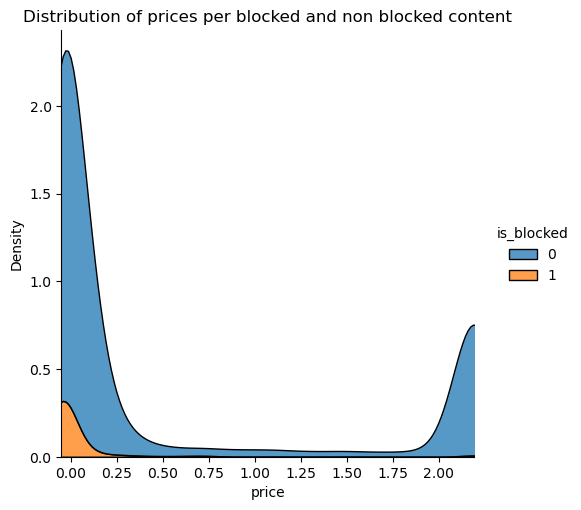

In [31]:
sns.displot(data=avito,x='price',hue='is_blocked',kind='kde',multiple='stack')
plt.xlim(avito['price'].min(), avito['price'].max())
plt.title('Distribution of prices per blocked and non blocked content')

### Sređivanje JSON podataka
Potrebno je izdvojiti JSON u posebne varijable?

In [ ]:
avito_subset.head()

In [ ]:
avito.head()

In [ ]:
import json
unique_keys = set()
def collect_keys(json_str):
    try:
        data = json.loads(json_str)
        unique_keys.update(data.keys())
    except:
        pass

avito['attrs'].apply(collect_keys)

# Define a function to parse and normalize the JSON attributes
def parse_and_normalize_attrs(json_str):
    try:
        data = json.loads(json_str)
        normalized_data = {key: data.get(key, None) for key in unique_keys}
        return normalized_data
    except:
        return {key: None for key in unique_keys}

# Apply the parsing and normalization function
attrs_df = avito['attrs'].apply(parse_and_normalize_attrs).apply(pd.Series)
attrs_df.head()

In [ ]:
print(attrs_df.info())
print(attrs_df.isnull().sum())

In [ ]:
cols = attrs_df.columns
for column in cols:
   attrs_df[column]= attrs_df[column].astype(str)

In [ ]:

for column in cols:
    attrs_df[column].fillna('None')

In [ ]:
avito = pd.concat([avito.drop(columns=['attrs']),attrs_df],axis = 1)

In [13]:
avito.head()

,category,subcategory,title,description,attrs,price,is_blocked,phones_cnt,emails_cnt,urls_cnt
0,Личные вещи,Товары для детей и игрушки,Коляска,"Теплый чехол на ножки, ремни безопасности, дож...","{""Вид товара"":""Детские коляски""}",-0.047945,0,0.0,0.0,0.0
1,Бытовая электроника,Планшеты и электронные книги,"7"" Планшет Perfeo 7777HD/A 8 Гб, 3G белый","Планшет новый, комплект полный, звоните, доста...","{""Вид товара"":""Планшеты""}",0.041096,0,0.0,0.0,0.0
4,Личные вещи,Товары для детей и игрушки,Шатер игрушечный складной,Шатер (палатка) для игр. Диаметр 120 см. Скла...,"{""Вид товара"":""Игрушки""}",-0.130137,0,0.0,0.0,0.0
5,Хобби и отдых,Коллекционирование,Рэмбо IV от Rambo-Store доставка,Вы всего в 3х шагах от владения легендарным но...,"{""Вид товара"":""Другое""}",0.513699,1,0.0,0.0,2.0
6,Транспорт,Автомобили с пробегом,"LADA Kalina, 2006","Не битая не крашеная. Все детали родные,нет рж...","{""Марка"":""ВАЗ (LADA)"", ""Модель"":""Kalina"", ""Год...",1.205479,0,0.0,0.0,0.0


In [14]:
avito['illicit'] = avito['is_blocked']
avito.drop(columns=['is_blocked'], axis = 1, inplace = True)
avito.head()

,category,subcategory,title,description,attrs,price,phones_cnt,emails_cnt,urls_cnt,illicit
0,Личные вещи,Товары для детей и игрушки,Коляска,"Теплый чехол на ножки, ремни безопасности, дож...","{""Вид товара"":""Детские коляски""}",-0.047945,0.0,0.0,0.0,0
1,Бытовая электроника,Планшеты и электронные книги,"7"" Планшет Perfeo 7777HD/A 8 Гб, 3G белый","Планшет новый, комплект полный, звоните, доста...","{""Вид товара"":""Планшеты""}",0.041096,0.0,0.0,0.0,0
4,Личные вещи,Товары для детей и игрушки,Шатер игрушечный складной,Шатер (палатка) для игр. Диаметр 120 см. Скла...,"{""Вид товара"":""Игрушки""}",-0.130137,0.0,0.0,0.0,0
5,Хобби и отдых,Коллекционирование,Рэмбо IV от Rambo-Store доставка,Вы всего в 3х шагах от владения легендарным но...,"{""Вид товара"":""Другое""}",0.513699,0.0,0.0,2.0,1
6,Транспорт,Автомобили с пробегом,"LADA Kalina, 2006","Не битая не крашеная. Все детали родные,нет рж...","{""Марка"":""ВАЗ (LADA)"", ""Модель"":""Kalina"", ""Год...",1.205479,0.0,0.0,0.0,0


Potrebno je uraditi:
 - one hot encoding za kategoriju i podkategoriju
 - tfidf za sve atribute, naslov i opis
 - probati razlicite varijante toga i algoritam ansambl
 - moras izuciti i pajplajnove

In [15]:
#One hot encoding za kategorije i podkategorije:
one_hot_encoded = pd.get_dummies(avito['category'], prefix='category')
one_hot_encoded2 = pd.get_dummies(avito['subcategory'], prefix='subcategory')

avito = pd.concat([avito, one_hot_encoded,one_hot_encoded2], axis = 1)
avito.drop(columns=['category','subcategory'], axis = 1, inplace = True)
avito.head()

,title,description,attrs,price,phones_cnt,emails_cnt,urls_cnt,illicit,category_Бытовая электроника,category_Для бизнеса,...,subcategory_Резюме,subcategory_Ремонт и строительство,subcategory_Собаки,subcategory_Спорт и отдых,subcategory_Телефоны,subcategory_Товары для детей и игрушки,subcategory_Товары для животных,subcategory_Товары для компьютера,subcategory_Фототехника,subcategory_Часы и украшения
0,Коляска,"Теплый чехол на ножки, ремни безопасности, дож...","{""Вид товара"":""Детские коляски""}",-0.047945,0.0,0.0,0.0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,"7"" Планшет Perfeo 7777HD/A 8 Гб, 3G белый","Планшет новый, комплект полный, звоните, доста...","{""Вид товара"":""Планшеты""}",0.041096,0.0,0.0,0.0,0,True,False,...,False,False,False,False,False,False,False,False,False,False
4,Шатер игрушечный складной,Шатер (палатка) для игр. Диаметр 120 см. Скла...,"{""Вид товара"":""Игрушки""}",-0.130137,0.0,0.0,0.0,0,False,False,...,False,False,False,False,False,True,False,False,False,False
5,Рэмбо IV от Rambo-Store доставка,Вы всего в 3х шагах от владения легендарным но...,"{""Вид товара"":""Другое""}",0.513699,0.0,0.0,2.0,1,False,False,...,False,False,False,False,False,False,False,False,False,False
6,"LADA Kalina, 2006","Не битая не крашеная. Все детали родные,нет рж...","{""Марка"":""ВАЗ (LADA)"", ""Модель"":""Kalina"", ""Год...",1.205479,0.0,0.0,0.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
avito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28340 entries, 0 to 39957
Data columns (total 63 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   title                                     28340 non-null  object 
 1   description                               28340 non-null  object 
 2   attrs                                     28340 non-null  object 
 3   price                                     28340 non-null  float64
 4   phones_cnt                                28340 non-null  float64
 5   emails_cnt                                28340 non-null  float64
 6   urls_cnt                                  28340 non-null  float64
 7   illicit                                   28340 non-null  int64  
 8   category_Бытовая электроника              28340 non-null  bool   
 9   category_Для бизнеса                      28340 non-null  bool   
 10  category_Для дома и дачи               

In [17]:
for column in avito.columns:
    if avito[column].dtype == "bool":
       avito[column]=avito[column].map({False:0,True:1})

In [18]:
avito.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28340 entries, 0 to 39957
Data columns (total 63 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   title                                     28340 non-null  object 
 1   description                               28340 non-null  object 
 2   attrs                                     28340 non-null  object 
 3   price                                     28340 non-null  float64
 4   phones_cnt                                28340 non-null  float64
 5   emails_cnt                                28340 non-null  float64
 6   urls_cnt                                  28340 non-null  float64
 7   illicit                                   28340 non-null  int64  
 8   category_Бытовая электроника              28340 non-null  int64  
 9   category_Для бизнеса                      28340 non-null  int64  
 10  category_Для дома и дачи               

In [ ]:
#preparacija za tfidf vektorizaciju
for column in avito.columns:
    if avito[column].dtype == object:
        avito[column] = avito[column].replace('None', '')

In [21]:
avito_object = avito.iloc[:,:3]

In [22]:
avito_object.head()

,title,description,attrs
0,Коляска,"Теплый чехол на ножки, ремни безопасности, дож...","{""Вид товара"":""Детские коляски""}"
1,"7"" Планшет Perfeo 7777HD/A 8 Гб, 3G белый","Планшет новый, комплект полный, звоните, доста...","{""Вид товара"":""Планшеты""}"
4,Шатер игрушечный складной,Шатер (палатка) для игр. Диаметр 120 см. Скла...,"{""Вид товара"":""Игрушки""}"
5,Рэмбо IV от Rambo-Store доставка,Вы всего в 3х шагах от владения легендарным но...,"{""Вид товара"":""Другое""}"
6,"LADA Kalina, 2006","Не битая не крашеная. Все детали родные,нет рж...","{""Марка"":""ВАЗ (LADA)"", ""Модель"":""Kalina"", ""Год..."


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_data = pd.DataFrame()

for column in avito_object.columns:
            tfidf_vectorizer = TfidfVectorizer(max_features=600)
            tfidf_matrix = tfidf_vectorizer.fit_transform(avito[column])
            tfidf_feature_df = pd.DataFrame(tfidf_matrix.toarray(), columns = [f'{column}_{word}' for word in tfidf_vectorizer.get_feature_names_out()])
            tfidf_data = pd.concat([tfidf_data, tfidf_feature_df], axis=1)
            
tfidf_data.columns

Index(['title_10', 'title_100', 'title_11', 'title_110', 'title_12',
       'title_13', 'title_14', 'title_15', 'title_16', 'title_16gb',
       ...
       'attrs_шипованные', 'attrs_ширина', 'attrs_шкафы', 'attrs_шотландская',
       'attrs_шпиц', 'attrs_штампованные', 'attrs_эксплуатация', 'attrs_юбки',
       'attrs_ювелирные', 'attrs_юридические'],
      dtype='object', length=1800)

In [24]:
tfidf_data.isna().sum().sum()

0

In [25]:
print(avito.shape)
print(tfidf_data.shape)

(28340, 63)
(28340, 1800)


In [26]:
avito.drop(columns=['title','description','attrs'],axis = 1, inplace = True)

In [27]:
tfidf_data.reset_index(drop=True, inplace=True)
avito.reset_index(drop=True,inplace=True)

In [28]:
avito_final = pd.concat([tfidf_data,avito],axis = 1)

In [31]:
avito_final['is_blocked'] = avito_final['illicit']

In [33]:
avito_final = avito_final.drop(columns=['illicit'])

In [36]:
X = avito_final.iloc[:,:-1]
y = avito_final.iloc[:,-1]

Hiperparametri koje bi trebalo gledati su:
```
priors : array-like of shape (n_classes,), default=None
    Prior probabilities of the classes. If specified, the priors are not
    adjusted according to the data.

var_smoothing : float, default=1e-9
    Portion of the largest variance of all features that is added to
    variances for calculation stability.

In [43]:
#probaj jednog naivnog bajesa - GaussianNB 
#komentarisi kako je problem do normalnosti podataka
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate,cross_val_predict
model = GaussianNB()
scoring = ['accuracy','roc_auc']
cv_scores = cross_validate(model, X, y, cv = 10,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))
y_pred = cross_val_predict(model, X, y, cv=10)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)


Train accuracy:  0.7130910374029641
Test accuracy: 0.7064220183486237
Train roc_auc:  0.8390285477706723
Test roc_auc: 0.8096619742855975
[[17440  8145]
 [  175  2580]]


Algoritam K najbližih suseda se koristi principom udaljenosti/sličnosti kako bi doneo odluku kojoj klasi neka instanca pripada.

Hiper-parametri o kojima bi trebalo voditi računa:
```
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'}, callable or None, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.

p : float, default=2
    Power parameter for the Minkowski metric. When p = 1, this is
    equivalent to using manhattan_distance (l1), and euclidean_distance
    (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric : str or callable, default='minkowski'
    Metric to use for distance computation. Default is "minkowski", which
    results in the standard Euclidean distance when p = 2. See the
    documentation of `scipy.spatial.distance
    <https://docs.scipy.org/doc/scipy/reference/spatial.distance.html>`_ and
    the metrics listed in
    :class:`~sklearn.metrics.pairwise.distance_metrics` for valid metric
    values.

In [59]:
#Moze i jedan KNN da se proba + optimizacija
#k parametra koriscenjem grid pretrage
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors = 11)
scoring = ['accuracy','roc_auc']
cv_scores = cross_validate(model_knn, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))
#y_pred = cross_val_predict(model_knn, X, y, cv=5)
#conf_matrix = confusion_matrix(y, y_pred)
#print(conf_matrix)

Train accuracy:  0.9535374029640085
Test accuracy: 0.9471418489767114
Train roc_auc:  0.9777630399646459
Test roc_auc: 0.938036302606131


In [57]:
from sklearn.model_selection import GridSearchCV
knn_params = {'n_neighbors':[3,5,7,9,11]}
grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv = 5, scoring = 'roc_auc')
grid.fit(X,y)
print('Best param: ', grid.best_params_)

Best param:  {'n_neighbors': 11}


In [51]:
#probaj stablo - zasto da ne, odatle takodje probaj 
#da odradis neki ansambl
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier(max_depth=5)
scoring = ['accuracy','roc_auc']
cv_scores = cross_validate(model_tree, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))
y_pred = cross_val_predict(model_tree, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

Train accuracy:  0.942607621736062
Test accuracy: 0.9405786873676781
Train roc_auc:  0.824841614567576
Test roc_auc: 0.8173060369211628
[[24928   657]
 [ 1022  1733]]


In [52]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression(max_iter=500)
scoring = ['accuracy','roc_auc']
cv_scores = cross_validate(model_lr, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))
y_pred = cross_val_predict(model_lr, X, y, cv=5)
conf_matrix = confusion_matrix(y, y_pred)
print(conf_matrix)

Train accuracy:  0.9604622441778405
Test accuracy: 0.9516231474947071
Train roc_auc:  0.9798865463756092
Test roc_auc: 0.9645950103335135
[[25123   462]
 [  909  1846]]


In [60]:
from sklearn.ensemble import BaggingClassifier

model_bc = BaggingClassifier(base_estimator = model, bootstrap = 3)
cv_scores = cross_validate(model_bc, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))
#y_pred = cross_val_predict(model_bc, X, y, cv=5)
#conf_matrix = confusion_matrix(y, y_pred)


c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in 

Train accuracy:  0.771894848270995
Test accuracy: 0.7647494707127735
Train roc_auc:  0.9079655170640409
Test roc_auc: 0.8730188720066595


In [61]:
model_bc = BaggingClassifier(base_estimator = model_tree, bootstrap = 3)
cv_scores = cross_validate(model_bc, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))

c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in 

Train accuracy:  0.94522759350741
Test accuracy: 0.9437544107268877
Train roc_auc:  0.8704426647838049
Test roc_auc: 0.8617233682820192


In [62]:
from sklearn.ensemble import AdaBoostClassifier
model_boost = AdaBoostClassifier(base_estimator=model, n_estimators=10,learning_rate=0.2)
cv_scores = cross_validate(model_boost, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))


c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train accuracy:  0.9286609033168667
Test accuracy: 0.9181016231474945
Train roc_auc:  0.9230794353152565
Test roc_auc: 0.8734377100352656


In [63]:
from sklearn.ensemble import AdaBoostClassifier
model_boost = AdaBoostClassifier(base_estimator=model_tree, n_estimators=10,learning_rate=0.2)
cv_scores = cross_validate(model_boost, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))


c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\jolov\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train accuracy:  0.9495501058574453
Test accuracy: 0.9434368383909668
Train roc_auc:  0.9625261707265949
Test roc_auc: 0.9346155851442843


In [65]:
from sklearn.ensemble import VotingClassifier
model_vc = VotingClassifier(voting='soft', estimators=[('tree', model_tree), ('gnb', model)])
cv_scores = cross_validate(model_vc, X, y, cv = 5,scoring = scoring, return_train_score=True)
for metric in scoring:
    print(f"Train {metric}: ", np.mean(cv_scores['train_'+metric]))
    print(f"Test {metric}:", np.mean(cv_scores['test_'+metric]))

Train accuracy:  0.7254940014114325
Test accuracy: 0.7173253352152434
Train roc_auc:  0.9395784092347949
Test roc_auc: 0.9082713505779638
